# Work in Progress

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [7]:
xs = np.arange(0, 5, 0.5)
y1 = [x*3 for x in xs]
y2 = [x**2 for x in xs]
y3 = [x for x in xs]

This was a simple plot, and there are some many more detailed things we can do with matplotlib. The plot function can take many keyword parameters that specify all kinds of stuff about the line to be plotted. Here is a plot with a few of those more detailed options used.

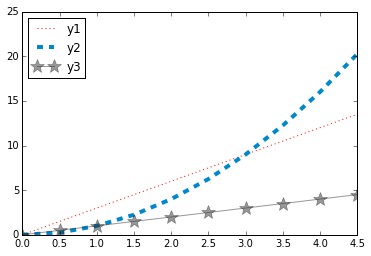

In [8]:
plt.plot(xs, y1, color="r", linestyle=":", label="y1")
plt.plot(xs, y2, color="#0088CC", linestyle="--", linewidth=4, label="y2")
plt.plot(xs, y3, color=(0.2, 0.2, 0.2), marker="*", markersize=15, alpha=0.5, label="y3")
plt.legend(loc=0)

This obviously isn't a plot designed to look good, but rather one to explain a lot of the parameters matplotlib can take. The [documentation for the matplotlib plot function](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot) has desciptions for all the possible things, so glance through that if you are interested.

* `color`: color of the points. You can specify colors directly, like `r` for red, `g` for green, `k` for black, etc. Matplotlib also knows the names for many colors, so if you ever need to plot something in chartreuse matplotlib has you covered. I'm serious, try changing one of the colors to `chartreuse`, and it will work. You can also pass in hex values, like the second line, or tuples of rgb values like the third.
* `linestyle`: This describes the format of the lines. The defulat is solid `-`, but there is also `--` for dashed, `:` for dotted, and `-.` for dot-dash.
* `label`: This tells what the title of each line should be in the legend.
* `linewidth`: pretty self explanatory. The larger the number, the thicker the line.
* `marker`: If you want to add individual points on the line, this can be used to specify the shape of the markers. There are a [bazillion options](http://matplotlib.org/api/markers_api.html#module-matplotlib.markers).
* `markersize`: again self explanatory. The larger the markersize, the larger the marker will be.
* `alpha`: This sets the transparency of the points or line. 1 is opaque, 0 is invisible. You can see how the gray stars are transparent, and you can see the blue line beneath. This is especially useful in scatter plots when you have lots of overlapping points. 

The legend is added with the simple `plt.legend()` call. The `loc=0` tells matplotlib to find the best location to put the legend. You can specify other things to put the legend in a specific place, but `loc=0` is often the most useful. [Here is the `legend()` documentation](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.legend), with a list of all the places you can put a legend. There are also a ton of other parameters that you can use to make a prettier legend.

These are just some of the parameters. To make nice looking plots, you might need to take some time to really fine tune things. Try changing some of the parameters above, then rerun the plot to really see how your changes affect the plot. Remember that when you rerun the cell with the plotting code, you don't need to rerun the code that we used to define our lists. Things done in earlier code stay in memory. This is why IPython notebooks are so awesome. If you have to do a lot of work to do some data analysis, you don't need to do that every time you want to remake your plot.

## Other types of  matplotlib plots

Things to eventually add:
* histogram
* errorbars
* scatter
* colorbars
* log plots
* text/annotations
* titles, labels, etc
* setting x/y limits
* saving plots
* LaTeX in plots